In [9]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import tables
from PIL import Image
import numpy as np

In [10]:
class LoadingDataset(object):
    def __init__(self, fname ,img_transform=None, mask_transform = None, edge_weight= False):
        self.fname=fname
        self.edge_weight = edge_weight
        self.img_transform=img_transform
        self.mask_transform = mask_transform
        self.tables=tables.open_file(self.fname)
        self.total_records = np.array(self.tables.root.total_elements)[0]
        self.cumsum_len = self.tables.root.cumsum_array

        #self.tables.close()
        
        self.img_1024 = None
        self.img_1200 = None
        self.img_1300 = None
        self.img_2044 = None
        self.img_2048 = None
        self.img_512 = None
        self.img_966 = None
        self.img_980 = None
        
       
        self.mask_1024 = None
        self.mask_1200 = None  
        self.mask_1300 = None 
        self.mask_2044 = None
        self.mask_2048 = None
        self.mask_512 = None
        self.mask_966 = None
        self.mask_980 = None
        
        
    def __getitem__(self, index):
        with tables.open_file(self.fname,'r') as db:
            self.img_1024 = db.root.img.data_1024
            self.img_1200 = db.root.img.data_1200
            self.img_1300 = db.root.img.data_1300
            self.img_2044 = db.root.img.data_2044
            self.img_2048 = db.root.img.data_2048
            self.img_512 = db.root.img.data_512
            self.img_966 = db.root.img.data_966
            self.img_980 = db.root.img.data_980
            
           
            self.mask_1024 = db.root.mask.data_1024
            self.mask_1200 = db.root.mask.data_1200
            self.mask_1300 = db.root.mask.data_1300
            self.mask_2044 = db.root.mask.data_2044
            self.mask_2048 = db.root.mask.data_2048
            self.mask_512 = db.root.mask.data_512
            self.mask_966 = db.root.mask.data_966
            self.mask_980 = db.root.mask.data_980

            if index >= self.total_records:
                raise IndexError("Index out of range")
    	    
            elif 0 <= index < self.cumsum_len[0]:
                img = self.img_1024[index,:,:,:]
                mask = self.mask_1024[index,:,:,:]

            elif self.cumsum_len[0] <= index < self.cumsum_len[1]:
                img = self.img_1200[(index - self.cumsum_len[0]),:,:,:]
                mask = self.mask_1200[(index - self.cumsum_len[0]),:,:,:]

            elif self.cumsum_len[1] <= index < self.cumsum_len[2]:
                img = self.img_1300[(index - self.cumsum_len[1]),:,:,:]
                mask = self.mask_1300[(index - self.cumsum_len[1]),:,:,:]

            elif self.cumsum_len[2] <= index < self.cumsum_len[3]:
                img = self.img_2044[(index - self.cumsum_len[2]),:,:,:]
                mask = self.mask_2044[(index - self.cumsum_len[2]),:,:,:]

            elif self.cumsum_len[3] <= index < self.cumsum_len[4]:
                img = self.img_2048[(index - self.cumsum_len[3]),:,:,:]
                mask = self.mask_2048[(index - self.cumsum_len[3]),:,:,:]

            elif self.cumsum_len[4] <= index < self.cumsum_len[5]:
                img = self.img_512[(index - self.cumsum_len[4]),:,:,:]
                mask = self.mask_512[(index - self.cumsum_len[4]),:,:,:]

            elif self.cumsum_len[5] <= index < self.cumsum_len[6]:
                img = self.img_966[(index - self.cumsum_len[5]),:,:,:]
                mask = self.mask_966[(index - self.cumsum_len[5]),:,:,:]

            elif self.cumsum_len[6] <= index < self.total_records:
                img = self.img_980[(index - self.cumsum_len[6]),:,:,:]
                mask = self.mask_980[(index - self.cumsum_len[6]),:,:,:]
            
            else:
                raise ValueError("Index out of range")
        	

            if ((img.shape[-2] > 1024) or (img.shape[-1] > 1024)):
                img_new = np.array(np.expand_dims(Image.fromarray(np.squeeze(img)).resize((1024, 1024)), axis=0)) #np.expand_dims(img, axis=0)#.astype('float32')
            else:
                img_new = img

            if ((mask.shape[-2] > 1024) or (mask.shape[-1] > 1024)):
                mask_new = np.empty((4, 1024, 1024))
                for channel in range(4):
                    mask_new[channel] = np.array(np.expand_dims(Image.fromarray(np.squeeze(mask[channel])).resize((1024, 1024)), axis=0)) #np.expand_dims(img, axis=0)#.astype('float32')
            else:
                mask_new = mask
    
            return img_new, mask_new
      
    def __len__(self):
        data_len =int(self.total_records)
        return data_len

In [11]:
batch_size=1
dataset={} 
dataLoader={}

In [12]:
data_paths = ['/media/local-admin/lightmycells/Study_1024/tools/pytables/study_1024_train.pytable',
              '/media/local-admin/lightmycells/Study_1024/tools/pytables/study_1024_valid.pytable',
              '/media/local-admin/lightmycells/Study_1024/tools/pytables/study_1024_test.pytable']


dataset["train"]=LoadingDataset(data_paths[0])
dataLoader["train"]=DataLoader(dataset["train"], batch_size=batch_size, 
                                shuffle=True, num_workers=0, pin_memory=False)
#tables.file._open_files.close_all()

Individual instances

torch.float32
tensor([[0.0210, 0.0199, 0.0200,  ..., 0.0217, 0.0217, 0.0218],
        [0.0209, 0.0206, 0.0214,  ..., 0.0225, 0.0226, 0.0222],
        [0.0209, 0.0206, 0.0209,  ..., 0.0222, 0.0221, 0.0222],
        ...,
        [0.0200, 0.0196, 0.0204,  ..., 0.0218, 0.0193, 0.0194],
        [0.0204, 0.0206, 0.0210,  ..., 0.0212, 0.0197, 0.0199],
        [0.0207, 0.0208, 0.0204,  ..., 0.0203, 0.0194, 0.0203]])


(-0.5, 1023.5, 1023.5, -0.5)

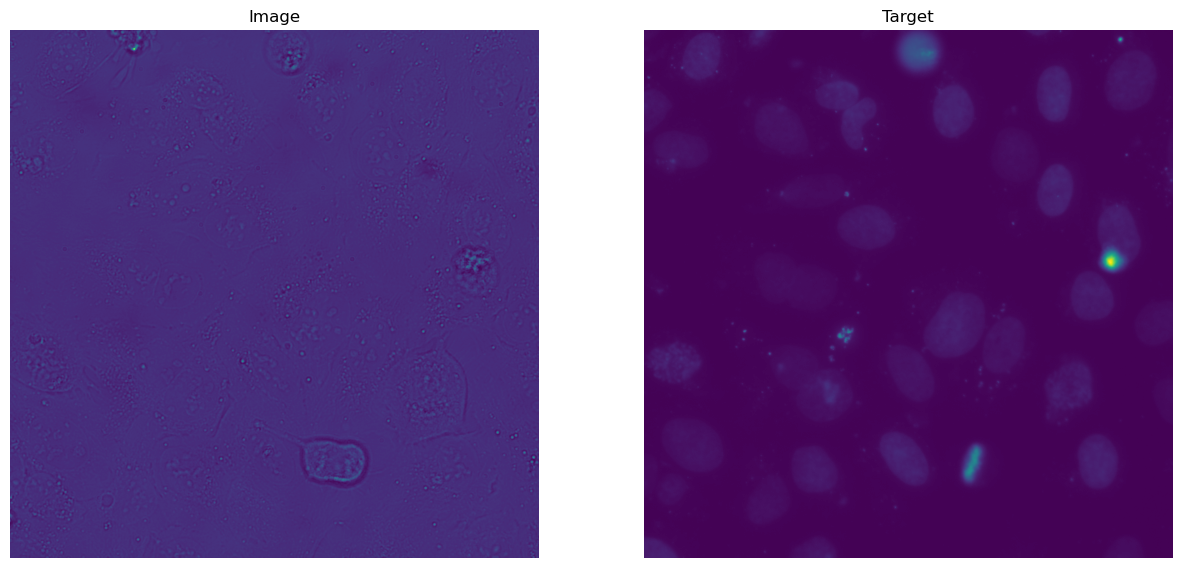

In [22]:
# Assuming 'dataloader' is your DataLoader object
dataiter = iter(dataLoader["train"])
first_batch = next(dataiter)

image = first_batch[0]
mask = first_batch[1]

# Visualize the first image and its target
plt.figure(figsize=(15, 10))

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(image[0][0]) 
print(image.dtype)
print(image[0][0])
plt.title('Image')
plt.axis('off')

    
# Plot the target
plt.subplot(1, 2, 2)
plt.imshow(mask[0][0])  
plt.title('Target')
plt.axis('off')

All from a set (e.g. train)

In [141]:
data_paths = ['/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_17/tools/pytables/test/study_patches_s_17_996_test.pytable']

for data_path in data_paths:
    dataset["test"]=Dataset(data_path)
    dataLoader["test"]=DataLoader(dataset["test"], batch_size=batch_size, 
                                shuffle=True, num_workers=0, pin_memory=False)
    tables.file._open_files.close_all()

    
    # Assuming your data loader returns tuples of (images, targets)
    # Replace 'train_loader' with the name of your data loader variable
    
    for images, targets in dataLoader["test"]:
        # Visualize the first image and its target
        
        plt.figure(figsize=(10, 5))

        # Plot the image
        plt.subplot(1, 2, 1)
        plt.imshow(images[0][0])  # Assuming images are in tensor format (B,C, H, W)
        plt.title('Image')
        plt.axis('off')
    
        # Plot the target
        plt.subplot(1, 2, 2)
        plt.imshow(targets[0][0])  # Assuming targets are in numpy array format (B,C,H, W)
        plt.title('Target')
        plt.axis('off')

NameError: name 'Dataset' is not defined

All sets (probably don't run this)

In [ ]:
data_paths = ['/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_17/tools/pytables/train/study_patches_s_17_1300_train.pytable',
              '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_17/tools/pytables/valid/study_patches_s_17_1300_valid.pytable',
              '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_17/tools/pytables/test/study_patches_s_17_1300_test.pytable']

for data_path in data_paths:
    dataset["train"]=Dataset(data_path)
    dataLoader["train"]=DataLoader(dataset["train"], batch_size=batch_size, 
                                shuffle=True, num_workers=0, pin_memory=False)
    tables.file._open_files.close_all()

    
    # Assuming your data loader returns tuples of (images, targets)
    # Replace 'train_loader' with the name of your data loader variable
    
    for images, targets in dataLoader["train"]:
        # Visualize the first image and its target
        
        plt.figure(figsize=(10, 5))

        # Plot the image
        plt.subplot(1, 2, 1)
        plt.imshow(images[0][0])  # Assuming images are in tensor format (B,C, H, W)
        plt.title('Image')
        plt.axis('off')
    
        # Plot the target
        plt.subplot(1, 2, 2)
        plt.imshow(targets[0][1])  # Assuming targets are in numpy array format (B,C,H, W)
        plt.title('Target')
        plt.axis('off')